In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cv2 as cv
import sys

carpeta_origen = '../csv/'
archivo_datos_completos_bsas = 'datos_minsal_completos_bsas.csv'
columnas_con_fechas = [8,9,11,13,15,22,24]
ruta = carpeta_origen + archivo_datos_completos_bsas
datos_completos_bsas = pd.read_csv(ruta, parse_dates=columnas_con_fechas, infer_datetime_format=True)


In [27]:
municipio = 'General Pueyrredón'
datos_municipio = datos_completos_bsas.loc[datos_completos_bsas['residencia_departamento_nombre']==municipio]
# sólo casos confirmados
datos_municipio = datos_municipio.loc[datos_municipio['clasificacion_resumen']=='Confirmado']
datos_municipio = datos_municipio.reset_index(drop=True)
datos_municipio


,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion,clasificacion_simple,edad_actual_anios
0,1004710,F,29.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-05-31,2020-06-02,...,6,Público,Caso confirmado por laboratorio - Activo Inter...,Confirmado,6,2020-09-07,357,2020-10-02,Activo,29.0
1,1014524,F,22.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,NaT,2020-06-03,...,6,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,6,2020-06-03,357,2020-10-02,Recuperado,22.0
2,1015432,M,32.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,NaT,2020-06-03,...,6,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,6,2020-06-03,357,2020-10-02,Recuperado,32.0
3,1017316,M,52.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-06-03,2020-06-04,...,6,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,6,2020-06-04,357,2020-10-02,Recuperado,52.0
4,1018407,F,73.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,NaT,2020-06-04,...,6,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,6,2020-08-29,357,2020-10-02,Recuperado,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14034,976328,F,47.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-05-24,2020-05-27,...,6,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,6,2020-09-29,357,2020-10-02,Recuperado,47.0
14035,982774,F,34.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-05-26,2020-05-28,...,6,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,6,2020-08-31,357,2020-10-02,Recuperado,34.0
14036,982987,M,57.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-05-25,2020-05-28,...,6,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,6,2020-08-29,357,2020-10-02,Recuperado,57.0
14037,994220,M,49.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,NaT,2020-05-30,...,6,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,6,2020-07-13,357,2020-10-02,Recuperado,49.0


&lt;matplotlib.axes._subplots.AxesSubplot at 0x2646527668&gt;

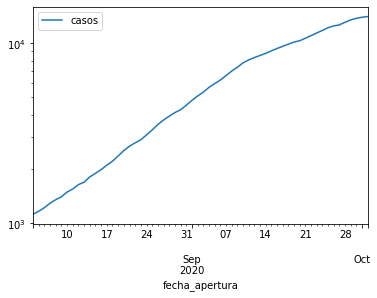

In [28]:
datos_municipio['casos'] = 1
casos_apertura = datos_municipio.pivot_table(
    index=['fecha_apertura'], values='casos',
    fill_value=0, aggfunc=np.sum
)
casos_apertura.cumsum().tail(60).plot(logy=True)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x26473dcba8&gt;

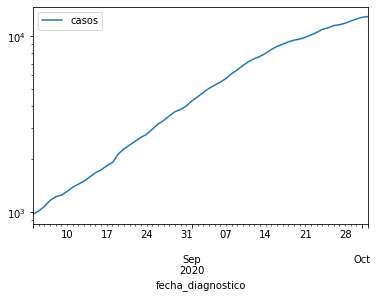

In [29]:
datos_municipio['casos'] = 1
casos_diagnostico = datos_municipio.pivot_table(
    index=['fecha_diagnostico'], values='casos',
    fill_value=0, aggfunc=np.sum
)
casos_diagnostico.cumsum().tail(60).plot(logy=True)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x26482ec160&gt;

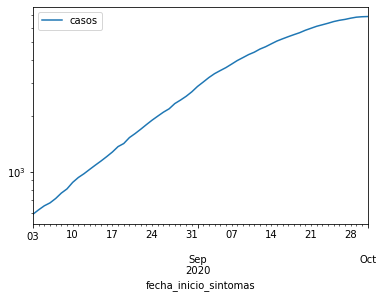

In [30]:
datos_municipio['casos'] = 1
casos_sintomas = datos_municipio.pivot_table(
    index=['fecha_inicio_sintomas'], values='casos',
    fill_value=0, aggfunc=np.sum
)
casos_sintomas.cumsum().tail(60).plot(logy=True)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x264844dac8&gt;

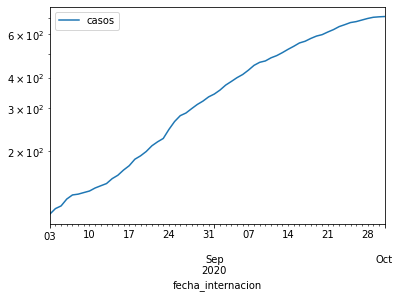

In [31]:
datos_municipio['casos'] = 1
casos_internacion = datos_municipio.pivot_table(
    index=['fecha_internacion'], values='casos',
    fill_value=0, aggfunc=np.sum
)
casos_internacion.cumsum().tail(60).plot(logy=True)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2647359e80&gt;

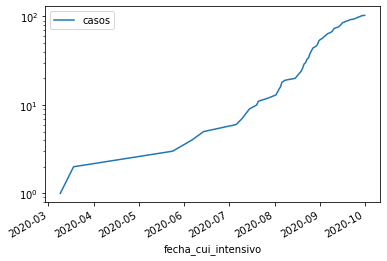

In [32]:
datos_municipio['casos'] = 1
casos_uci = datos_municipio.pivot_table(
    index=['fecha_cui_intensivo'], values='casos',
    fill_value=0, aggfunc=np.sum
)
casos_uci.cumsum().tail(60).plot(logy=True)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x26488757b8&gt;

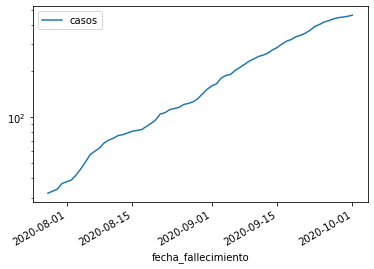

In [33]:
datos_municipio['casos'] = 1
casos_fallecimiento = datos_municipio.pivot_table(
    index=['fecha_fallecimiento'], values='casos',
    fill_value=0, aggfunc=np.sum
)
casos_fallecimiento.cumsum().tail(64).plot(logy=True)


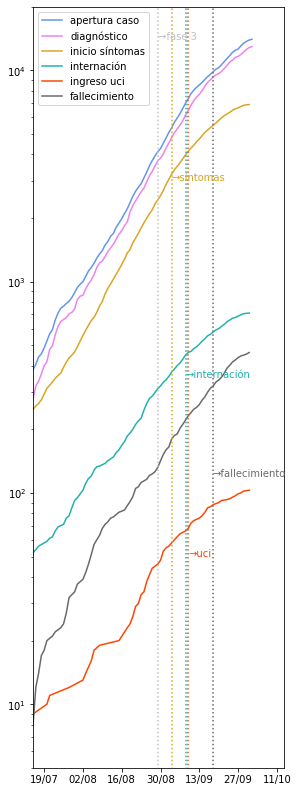

In [34]:

fig, ax = plt.subplots(1,1,figsize=(4.5,14))
ax.plot(casos_apertura.index,      casos_apertura.casos.cumsum(),      label='apertura caso',   color='cornflowerblue')
ax.plot(casos_diagnostico.index,   casos_diagnostico.casos.cumsum(),   label='diagnóstico',     color='violet')
ax.plot(casos_sintomas.index,      casos_sintomas.casos.cumsum(),      label='inicio síntomas', color='goldenrod')
ax.plot(casos_internacion.index,   casos_internacion.casos.cumsum(),   label='internación',     color='lightseagreen')
ax.plot(casos_uci.index,           casos_uci.casos.cumsum(),           label='ingreso uci',     color='orangered')
ax.plot(casos_fallecimiento.index, casos_fallecimiento.casos.cumsum(), label='fallecimiento',   color='dimgrey')

# días desde exposición
dias_sintomas = 5                           # buscar fuente de datos
dias_internacion = dias_sintomas + 5.1      # fuente base de datos minsal
dias_uci = dias_sintomas + 6.0              # fuente base de datos minsal
dias_fallecimiento = dias_sintomas + 14.9   # fuente base de datos minsal

# línea vertical fase 3
fecha_linea = mdates.datestr2num('2020/08/29')
plt.plot([fecha_linea, fecha_linea], [0, 20000], ':',               color='silver', lw=1.5)
plt.text( fecha_linea,                   14000,  '→fase 3',         color='silver', fontsize=10)
# línea vertical fase 3 + sintomas
fecha_linea = mdates.datestr2num('2020/08/29') + dias_sintomas
plt.plot([fecha_linea, fecha_linea], [0, 20000], ':',               color='goldenrod', lw=1.5)
plt.text( fecha_linea,                    3000,  '→síntomas',       color='goldenrod', fontsize=10)
# línea vertical fase 3 + internación
fecha_linea = mdates.datestr2num('2020/08/29') + dias_internacion
plt.plot([fecha_linea, fecha_linea], [0, 20000], ':',               color='lightseagreen', lw=1.5)
plt.text( fecha_linea,                     350,  '→internación',    color='lightseagreen', fontsize=10)
# línea vertical fase 3 + uci
fecha_linea = mdates.datestr2num('2020/08/29') + dias_uci
plt.plot([fecha_linea, fecha_linea], [0, 20000], ':',               color='orangered', lw=1.5)
plt.text( fecha_linea,                      50,  '→uci',            color='orangered', fontsize=10)
# línea vertical fase 3 + fallecimiento
fecha_linea = mdates.datestr2num('2020/08/29') + dias_fallecimiento
plt.plot([fecha_linea, fecha_linea], [0, 20000], ':',               color='dimgrey', lw=1.5)
plt.text( fecha_linea,                     120,  '→fallecimiento',  color='dimgrey', fontsize=10)

plt.yscale('log')
plt.legend(loc='best')
ax.set_ylim(bottom=5, top=20000)
ax.set_xlim(left=mdates.datestr2num('2020/07/15'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
ax.xaxis.set_major_locator(mdates.WeekdayLocator(6, interval=2))

In [35]:
inicio_pendiente = pd.to_datetime('2020/08/01')
fin_pendiente = pd.to_datetime('2020/08/29')

datos_pendiente = casos_sintomas
x = datos_pendiente.index[(datos_pendiente.index>=inicio_pendiente) & (datos_pendiente.index<=fin_pendiente)].to_numpy()
y = datos_pendiente.casos.cumsum()[(datos_pendiente.index>=inicio_pendiente) & (datos_pendiente.index<=fin_pendiente)].to_numpy()
a, b = np.polyfit(mdates.date2num(x), np.log(y), 1)
datos_pendiente['regresion'] = np.exp(a * mdates.date2num(datos_pendiente.index) + b)

datos_pendiente = casos_internacion
x = datos_pendiente.index[(datos_pendiente.index>=inicio_pendiente) & (datos_pendiente.index<=fin_pendiente)].to_numpy()
y = datos_pendiente.casos.cumsum()[(datos_pendiente.index>=inicio_pendiente) & (datos_pendiente.index<=fin_pendiente)].to_numpy()
a, b = np.polyfit(mdates.date2num(x), np.log(y), 1)
datos_pendiente['regresion'] = np.exp(a * mdates.date2num(datos_pendiente.index) + b)

datos_pendiente = casos_uci
x = datos_pendiente.index[(datos_pendiente.index>=inicio_pendiente) & (datos_pendiente.index<=fin_pendiente)].to_numpy()
y = datos_pendiente.casos.cumsum()[(datos_pendiente.index>=inicio_pendiente) & (datos_pendiente.index<=fin_pendiente)].to_numpy()
a, b = np.polyfit(mdates.date2num(x), np.log(y), 1)
datos_pendiente['regresion'] = np.exp(a * mdates.date2num(datos_pendiente.index) + b)

datos_pendiente = casos_fallecimiento
x = datos_pendiente.index[(datos_pendiente.index>=inicio_pendiente) & (datos_pendiente.index<=fin_pendiente)].to_numpy()
y = datos_pendiente.casos.cumsum()[(datos_pendiente.index>=inicio_pendiente) & (datos_pendiente.index<=fin_pendiente)].to_numpy()
a, b = np.polyfit(mdates.date2num(x), np.log(y), 1)
datos_pendiente['regresion'] = np.exp(a * mdates.date2num(datos_pendiente.index) + b)


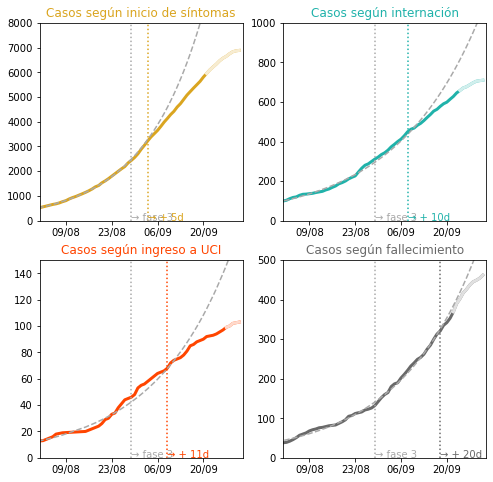

In [41]:
# función para graficar
def graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea, lag=0):
    # título
    ax.set_title(titulo, color=color_linea)
    # datos
    ax.plot(datos.index, datos.casos.cumsum(), color=color_linea, lw=3)
    # marcar lag
    ax.plot(datos.tail(lag).index, datos.casos.cumsum().tail(lag), color='white', lw=3, alpha=0.8)
    # regresión
    ax.plot(datos.index, datos.regresion, '--', color='darkgrey')
    # línea vertical fase 3
    ax.plot([fecha_fase3, fecha_fase3], [minimo, maximo], ':',        color='darkgrey', lw=1.5)
    ax.text( fecha_fase3,                minimo*3,        '→ fase 3', color='darkgrey', fontsize=10)
    # línea vertical fase 3 + sintomas
    fecha_linea = fecha_fase3 + dias_linea
    ax.plot([fecha_linea, fecha_linea], [minimo, maximo], ':',                          color=color_linea, lw=1.5)
    ax.text( fecha_linea,                minimo*6,       '→ + '+str(round(dias_linea))+'d',   color=color_linea, fontsize=10)
    # escala
    #ax.set_yscale('log')
    ax.set_xlim(left=fecha_inicio, right=fecha_fin)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(6, interval=2))
    ax.set_ylim(bottom=minimo, top=maximo)

# fase 3
fecha_fase3 = mdates.datestr2num('2020/08/29')

# días desde exposición
dias_sintomas = 5                           # buscar fuente de datos
dias_internacion = dias_sintomas + 5.1      # fuente base de datos minsal
dias_uci = dias_sintomas + 6.0              # fuente base de datos minsal
dias_fallecimiento = dias_sintomas + 14.9   # fuente base de datos minsal

# límites gráfico
fecha_inicio = mdates.datestr2num('2020/08/01')
fecha_fin = mdates.datestr2num('2020/10/02')

minimo=0    # para escala lineal

fig, axes = plt.subplots(2, 2, figsize=(8,8))

ax = axes[0,0]
datos = casos_sintomas
titulo = 'Casos según inicio de síntomas'
#minimo = 320
maximo = 8000
dias_linea = dias_sintomas
color_linea = 'goldenrod'
graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea, lag=11)

ax = axes[0,1]
datos = casos_internacion
titulo = 'Casos según internación'
#minimo = 40
maximo = 1000
dias_linea = dias_internacion
color_linea = 'lightseagreen'
graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea, lag=8)


ax = axes[1,0]
datos = casos_uci
titulo = 'Casos según ingreso a UCI'
#minimo = 6
maximo = 150
dias_linea = dias_uci
color_linea = 'orangered'
graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea, lag=4)


ax = axes[1,1]
datos = casos_fallecimiento
titulo = 'Casos según fallecimiento'
#minimo = 20
maximo = 500
dias_linea = dias_fallecimiento
color_linea = 'dimgrey'
graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea, lag=10)

ultima_actualizacion = datos_municipio.loc[0,'ultima_actualizacion']
ultima_actualizacion_str = ultima_actualizacion.strftime('%Y-%m-%d')

carpeta = '../graficos/'
archivo_hoy = 'fase3_mdp_ultima.png'
plt.savefig(carpeta+archivo_hoy, dpi=150)


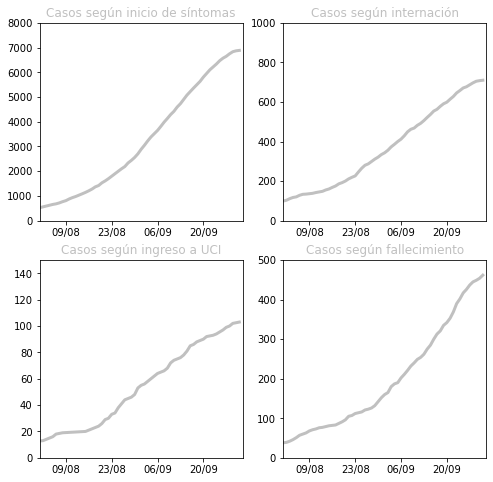

In [37]:
# función para graficar
def graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea, lag=0):
    # título
    ax.set_title(titulo, color=color_linea)
    # datos
    ax.plot(datos.index, datos.casos.cumsum(), color=color_linea, lw=3)
    # marcar lag
    #ax.plot(datos.tail(lag).index, datos.casos.cumsum().tail(lag), ':', color='white', lw=3)
    # regresión
    #ax.plot(datos.index, datos.regresion, '--', color='darkgrey')
    # línea vertical fase 3
    #ax.plot([fecha_fase3, fecha_fase3], [minimo, maximo], ':',        color='darkgrey', lw=1.5)
    #ax.text( fecha_fase3,                minimo*3,        '→ fase 3', color='darkgrey', fontsize=10)
    # línea vertical fase 3 + sintomas
    #fecha_linea = fecha_fase3 + dias_linea
    #ax.plot([fecha_linea, fecha_linea], [minimo, maximo], ':',                          color=color_linea, lw=1.5)
    #ax.text( fecha_linea,                minimo*6,       '→ + '+str(round(dias_linea))+'d',   color=color_linea, fontsize=10)
    # escala
    #ax.set_yscale('log')
    ax.set_xlim(left=fecha_inicio, right=fecha_fin)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(6, interval=2))
    ax.set_ylim(bottom=minimo, top=maximo)

# fase 3
fecha_fase3 = mdates.datestr2num('2020/08/29')

minimo = 0  # para escala lineal

# días desde exposición
dias_sintomas = 5                           # buscar fuente de datos
dias_internacion = dias_sintomas + 5.1      # fuente base de datos minsal
dias_uci = dias_sintomas + 6.0              # fuente base de datos minsal
dias_fallecimiento = dias_sintomas + 14.9   # fuente base de datos minsal

# límites gráfico
fecha_inicio = mdates.datestr2num('2020/08/01')
fecha_fin = mdates.datestr2num('2020/10/02')

fig, axes = plt.subplots(2, 2, figsize=(8,8))

ax = axes[0,0]
datos = casos_sintomas
titulo = 'Casos según inicio de síntomas'
#minimo = 320
maximo = 8000
dias_linea = dias_sintomas
color_linea = 'silver'
graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea)

ax = axes[0,1]
datos = casos_internacion
titulo = 'Casos según internación'
#minimo = 40
maximo = 1000
dias_linea = dias_internacion
color_linea = 'silver'
graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea)


ax = axes[1,0]
datos = casos_uci
titulo = 'Casos según ingreso a UCI'
#minimo = 6
maximo = 150
dias_linea = dias_uci
color_linea = 'silver'
graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea)


ax = axes[1,1]
datos = casos_fallecimiento
titulo = 'Casos según fallecimiento'
#minimo = 20
maximo = 500
dias_linea = dias_fallecimiento
color_linea = 'silver'
graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea)

ultima_actualizacion = datos_municipio.loc[0,'ultima_actualizacion']
ultima_actualizacion_str = ultima_actualizacion.strftime('%Y-%m-%d')

carpeta = '../graficos/'
archivo = 'fase3_mdp_datos_' + ultima_actualizacion_str + '.png'
plt.savefig(carpeta+archivo, dpi=150)

In [42]:
dia_anterior = ultima_actualizacion - pd.Timedelta('1 days')
dia_anterior_str = dia_anterior.strftime('%Y-%m-%d')

archivo_dia_anterior = 'fase3_mdp_datos_' + dia_anterior_str + '.png'

imagen_anterior =   cv.imread(cv.samples.findFile(carpeta + archivo_dia_anterior))
imagen_actual =     cv.imread(cv.samples.findFile(carpeta + archivo_hoy))
if imagen_anterior is None:
    sys.exit('no se pudo leer imagen día anterior')
if imagen_actual is None:
    sys.exit('no se pudo leer imagen actual')

#cv.imshow("Display window", img)

imagen_actual_grises = cv.cvtColor(imagen_actual, cv.COLOR_BGR2GRAY)
_, imagen_actual_filtro = cv.threshold(imagen_actual_grises, 254, 255, 0)

#imagen_actual_hsv = cv.cvtColor(imagen_actual, cv.COLOR_BGR2HSV)
#imagen_actual_filtro_hsv = cv.inRange(imagen_actual_hsv, (0, 1, 0), (255, 255, 255))

mezcla = cv.addWeighted(imagen_anterior, 0.3, imagen_actual, 0.7, 0)

archivo_destino = 'fase3_mdp.png'
cv.imwrite(archivo_destino, mezcla)
cv.imwrite(carpeta + archivo_destino, mezcla)


True

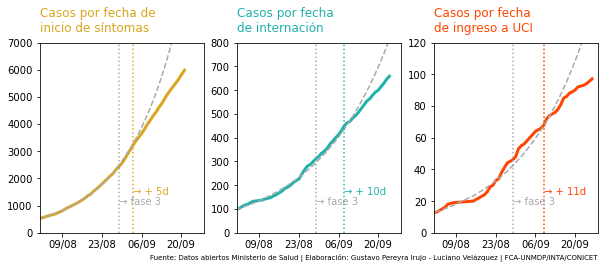

In [39]:
# función para graficar
def graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea, lag=0):
    # título
    ax.set_title(titulo, color=color_linea, horizontalalignment='left', x=0.0, y=1.025)
    # datos
    ax.plot(datos.index, datos.casos.cumsum(), color=color_linea, lw=3)
    # marcar lag
    ax.plot(datos.tail(lag).index, datos.casos.cumsum().tail(lag), color='white', lw=5, alpha=1)
    # regresión
    ax.plot(datos.index, datos.regresion, '--', color='darkgrey')
    # línea vertical fase 3
    ax.plot([fecha_fase3, fecha_fase3], [minimo, maximo], ':',        color='darkgrey', lw=1.5)
    ax.text( fecha_fase3,                maximo*.15,        '→ fase 3', color='darkgrey', fontsize=10)
    # línea vertical fase 3 + sintomas
    fecha_linea = fecha_fase3 + dias_linea
    ax.plot([fecha_linea, fecha_linea], [minimo, maximo], ':',                          color=color_linea, lw=1.5)
    ax.text( fecha_linea,                maximo*.2,       '→ + '+str(round(dias_linea))+'d',   color=color_linea, fontsize=10)
    # escala
    #ax.set_yscale('log')
    ax.set_xlim(left=fecha_inicio, right=fecha_fin)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(6, interval=2))
    ax.set_ylim(bottom=minimo, top=maximo)

# fase 3
fecha_fase3 = mdates.datestr2num('2020/08/29')

# días desde exposición
dias_sintomas = 5                           # buscar fuente de datos
dias_internacion = dias_sintomas + 5.1      # fuente base de datos minsal
dias_uci = dias_sintomas + 6.0              # fuente base de datos minsal
dias_fallecimiento = dias_sintomas + 14.9   # fuente base de datos minsal

# límites gráfico
fecha_inicio = mdates.datestr2num('2020/08/01')
fecha_fin = mdates.datestr2num('2020/09/28')

minimo = 0  # para escala lineal

fig, axes = plt.subplots(1, 3, figsize=(10,3.5))
#fig, axes = plt.subplots(1, 4, figsize=(14,3.5))

ax = axes[0]
datos = casos_sintomas
titulo = 'Casos por fecha de\ninicio de síntomas'
#minimo = 320
maximo = 7000
dias_linea = dias_sintomas
color_linea = 'goldenrod'
graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea, lag=10)

ax = axes[1]
datos = casos_internacion
titulo = 'Casos por fecha\nde internación'
#minimo = 40
maximo = 800
dias_linea = dias_internacion
color_linea = 'lightseagreen'
graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea, lag=7)


ax = axes[2]
datos = casos_uci
titulo = 'Casos por fecha\nde ingreso a UCI'
#minimo = 6
maximo = 120
dias_linea = dias_uci
color_linea = 'orangered'
graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea, lag=4)

ax.set_xlabel('Fuente: Datos abiertos Ministerio de Salud | Elaboración: Gustavo Pereyra Irujo - Luciano Velázquez | FCA-UNMDP/INTA/CONICET', fontsize=7, horizontalalignment='right', x=1.0)

'''
ax = axes[3]
datos = casos_fallecimiento
titulo = 'Casos según fecha\nde fallecimiento'
#minimo = 20
maximo = 500
dias_linea = dias_fallecimiento
color_linea = 'dimgrey'
graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea, lag=0)
'''

ultima_actualizacion = datos_municipio.loc[0,'ultima_actualizacion']
ultima_actualizacion_str = ultima_actualizacion.strftime('%Y-%m-%d')

carpeta = '../graficos/'
archivo_hoy = 'fase3_mdp_fis_int_uci.png'
plt.savefig(carpeta+archivo_hoy, bbox_inches = 'tight', pad_inches = 0.1, dpi=150)


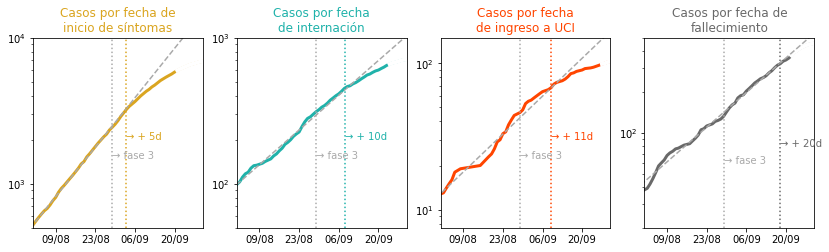

In [40]:
# función para graficar
def graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea, lag=0):
    # título
    ax.set_title(titulo, color=color_linea)
    # datos
    ax.plot(datos.index, datos.casos.cumsum(), color=color_linea, lw=3)
    # marcar lag
    ax.plot(datos.tail(lag).index, datos.casos.cumsum().tail(lag), color='white', lw=4, alpha=1)
    # regresión
    ax.plot(datos.index, datos.regresion, '--', color='darkgrey')
    # línea vertical fase 3
    ax.plot([fecha_fase3, fecha_fase3], [minimo, maximo], ':',        color='darkgrey', lw=1.5)
    ax.text( fecha_fase3,                minimo*3,        '→ fase 3', color='darkgrey', fontsize=10)
    # línea vertical fase 3 + sintomas
    fecha_linea = fecha_fase3 + dias_linea
    ax.plot([fecha_linea, fecha_linea], [minimo, maximo], ':',                          color=color_linea, lw=1.5)
    ax.text( fecha_linea,                minimo*4,       '→ + '+str(round(dias_linea))+'d',   color=color_linea, fontsize=10)
    # escala
    ax.set_yscale('log')
    ax.set_xlim(left=fecha_inicio, right=fecha_fin)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(6, interval=2))
    ax.set_ylim(bottom=minimo, top=maximo)

# fase 3
fecha_fase3 = mdates.datestr2num('2020/08/29')

# días desde exposición
dias_sintomas = 5                           # buscar fuente de datos
dias_internacion = dias_sintomas + 5.1      # fuente base de datos minsal
dias_uci = dias_sintomas + 6.0              # fuente base de datos minsal
dias_fallecimiento = dias_sintomas + 14.9   # fuente base de datos minsal

# límites gráfico
fecha_inicio = mdates.datestr2num('2020/08/01')
fecha_fin = mdates.datestr2num('2020/09/30')

fig, axes = plt.subplots(1, 4, figsize=(14,3.5))

ax = axes[0]
datos = casos_sintomas
titulo = 'Casos por fecha de\ninicio de síntomas'
minimo = 500
maximo = 10000
dias_linea = dias_sintomas
color_linea = 'goldenrod'
graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea, lag=11)

ax = axes[1]
datos = casos_internacion
titulo = 'Casos por fecha\nde internación'
minimo = 50
maximo = 1000
dias_linea = dias_internacion
color_linea = 'lightseagreen'
graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea, lag=8)


ax = axes[2]
datos = casos_uci
titulo = 'Casos por fecha\nde ingreso a UCI'
minimo = 7.5
maximo = 150
dias_linea = dias_uci
color_linea = 'orangered'
graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea, lag=4)


ax = axes[3]
datos = casos_fallecimiento
titulo = 'Casos por fecha de\nfallecimiento'
minimo = 20
maximo = 500
dias_linea = dias_fallecimiento
color_linea = 'dimgrey'
graficar(ax, datos, titulo, minimo, maximo, dias_linea, color_linea, lag=10)


ultima_actualizacion = datos_municipio.loc[0,'ultima_actualizacion']
ultima_actualizacion_str = ultima_actualizacion.strftime('%Y-%m-%d')

carpeta = '../graficos/'
archivo_hoy = 'fase3_mdp_fis_int_uci_log.png'
plt.savefig(carpeta+archivo_hoy, dpi=150)
